# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用交叉验证快速选择模型

## 挑战介绍

前面的课程中，我们一起学习了多个不同的分类预测方法。当你在实际工程实践时，如何快速地从这些机器学习方法中找到最适合的那一个呢？这就涉及到模型选择的知识。本次挑战中，我们将了解到 K 折交叉验证方法，并使用该方法完成模型选择。

## 挑战知识点

- 交叉验证
- 模型选择

---

## 挑战内容

本周，我们学习了监督学习中的多个不同的分类方法，相信你已经对这些方法的原理和实现过程有了充分掌握。当你学完这些方法后，可能会产生一个疑问，那就是如何快速从不同的机器学习方法中挑选出最适合当前应用场景的方法呢？

要回答这个问题，我们先回顾一下 K-近邻方法 的实验内容。在 K-近邻课程的最后，实验介绍了 K 值的选择。当时，我们通过尝试从 2 到 10 的不同 K 值找到最适合的那一个。这个办法虽然看起来有点「笨」，但用起来还不错。

模型选择过程有点类似。当我们要从多个模型中快速选择一个较为合适的模型时，也可以把数据依次放到每个模型中去测试，找到泛化能力较强的那一个。虽然这是一个「笨」办法，但在实验流程上也有一些取巧的步骤。其中之一，就是今天要介绍的 K 折交叉验证（k-fold cross-validation）。

### K 折交叉验证介绍

首先，我们来讲一下什么是 K 折交叉验证。K 折交叉验证是交叉验证中的一种常见方法，其通过将数据集均分成 K 个子集，并依次将其中的 K-1 个子集作为训练集，剩下的 1 个子集用作测试集。在 K 折交叉验证的过程中，每个子集均会被验证一次。

下面通过一张图示来解释 K 折交叉验证的过程：

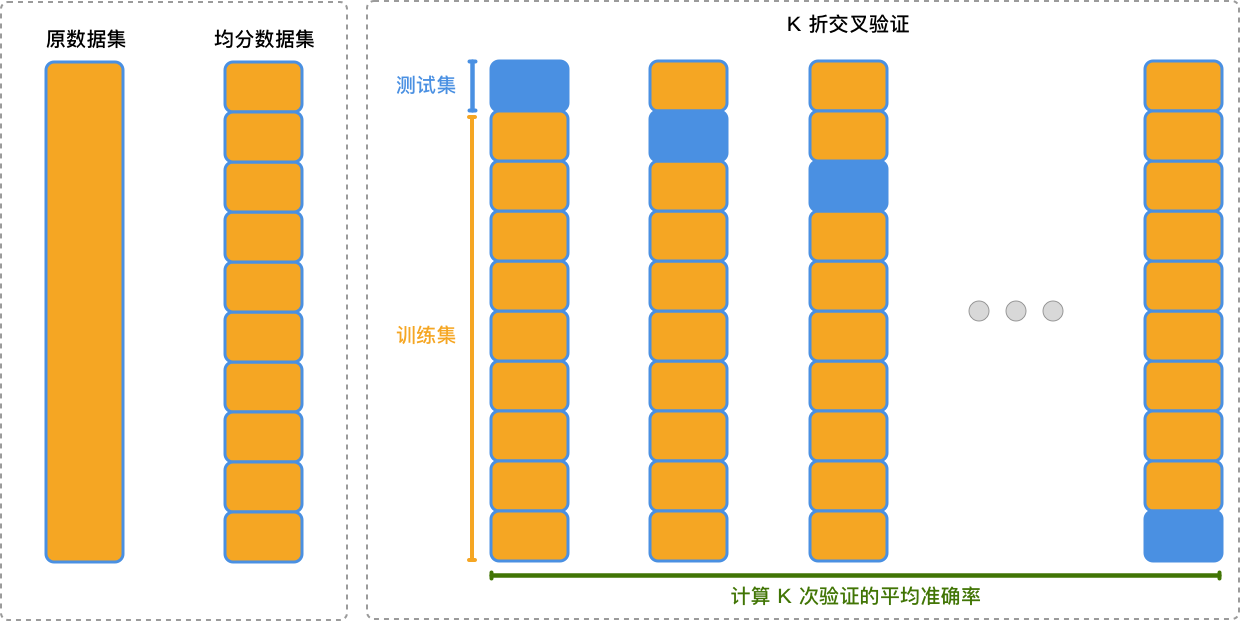

如上图所示，使用 K 折交叉验证的步骤如下：

**1. 首先将数据集均分为 K 个子集。**

**2. 依次选取其中的 K-1 个子集作为训练集，剩下的 1 个子集用作测试集进行实验。**

**3. 计算每次验证结果的平均值作为最终结果。**

相比于手动划分数据集，K 折交叉验证让每一条数据都有均等的几率被用于训练和验证，在一定程度上能提升模型的泛化能力。

### 数据集预处理

下面正式开始本次挑战。本次挑战所使用到的是 Abalone（鲍鱼）年龄数据集 `challenge-6-abalone.csv`。首先，实验需要通过下面的链接下载该数据集。

In [ ]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/challenge-6-abalone.csv

---

**<font color='red'>挑战</font>：加载 `challenge-6-abalone.csv` 数据集，并预览前 `5` 行。**

In [ ]:
import pandas as pd

### 代码开始 ### (≈ 2 行代码)
df = pd.read_csv("challenge-6-abalone.csv")
df.head()
### 代码结束 ###

**期望输出：**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>M</th>
      <th>0.455</th>
      <th>0.365</th>
      <th>0.095</th>
      <th>0.514</th>
      <th>0.2245</th>
      <th>0.101</th>
      <th>0.15</th>
      <th>15</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>M</td>
      <td>0.35</td>
      <td>0.265</td>
      <td>0.09</td>
      <td>0.2255</td>
      <td>0.0995</td>
      <td>0.0485</td>
      <td>0.07</td>
      <td>7</td>
    </tr>
    <tr>
      <th>1</th>
      <td>F</td>
      <td>0.53</td>
      <td>0.42</td>
      <td>0.135</td>
      <td>0.677</td>
      <td>0.2565</td>
      <td>0.1415</td>
      <td>0.21</td>
      <td>9</td>
    </tr>
    <tr>
      <th>2</th>
      <td>M</td>
      <td>0.44</td>
      <td>0.365</td>
      <td>0.125</td>
      <td>0.516</td>
      <td>0.2155</td>
      <td>0.114</td>
      <td>0.155</td>
      <td>10</td>
    </tr>
    <tr>
      <th>3</th>
      <td>I</td>
      <td>0.33</td>
      <td>0.255</td>
      <td>0.08</td>
      <td>0.205</td>
      <td>0.0895</td>
      <td>0.0395</td>
      <td>0.055</td>
      <td>7</td>
    </tr>
    <tr>
      <th>4</th>
      <td>I</td>
      <td>0.425</td>
      <td>0.3</td>
      <td>0.095</td>
      <td>0.3515</td>
      <td>0.141</td>
      <td>0.0775</td>
      <td>0.12</td>
      <td>8</td>
    </tr>
  </tbody>
</table>

此时，你会发现该数据集的列名有些问题，好像是数据值。其实，这是由于数据集不规范造成的，该数据集的列名位于最后一行，我们可以预览后 5 行查看。

---

**<font color='red'>挑战</font>：预览数据集最后 `5` 行。**

In [ ]:
### 代码开始 ### (≈ 1 行代码)
df.tail()
### 代码结束 ###

**期望输出：**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>M</th>
      <th>0.455</th>
      <th>0.365</th>
      <th>0.095</th>
      <th>0.514</th>
      <th>0.2245</th>
      <th>0.101</th>
      <th>0.15</th>
      <th>15</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4172</th>
      <td>M</td>
      <td>0.59</td>
      <td>0.44</td>
      <td>0.135</td>
      <td>0.966</td>
      <td>0.439</td>
      <td>0.2145</td>
      <td>0.2605</td>
      <td>10</td>
    </tr>
    <tr>
      <th>4173</th>
      <td>M</td>
      <td>0.6</td>
      <td>0.475</td>
      <td>0.205</td>
      <td>1.176</td>
      <td>0.5255</td>
      <td>0.2875</td>
      <td>0.308</td>
      <td>9</td>
    </tr>
    <tr>
      <th>4174</th>
      <td>F</td>
      <td>0.625</td>
      <td>0.485</td>
      <td>0.15</td>
      <td>1.0945</td>
      <td>0.531</td>
      <td>0.261</td>
      <td>0.296</td>
      <td>10</td>
    </tr>
    <tr>
      <th>4175</th>
      <td>M</td>
      <td>0.71</td>
      <td>0.555</td>
      <td>0.195</td>
      <td>1.9485</td>
      <td>0.9455</td>
      <td>0.3765</td>
      <td>0.495</td>
      <td>12</td>
    </tr>
    <tr>
      <th>4176</th>
      <td>Sex</td>
      <td>Length</td>
      <td>Diameter</td>
      <td>Height</td>
      <td>Whole weight</td>
      <td>Shucked weight</td>
      <td>Viscera weight</td>
      <td>Shell weight</td>
      <td>Rings</td>
    </tr>
  </tbody>
</table>

如上表所示，索引为 4176 的行竟然是列名。所以，我们需要将列名放到正确的位置，也就是要重新生成数据集组成的 DataFrame。

---

**<font color='red'>挑战</font>：给数据集设定正确的列名，并保留被错误用于列名的数据行，同时删除最后一行被错误放置的列名。**

In [ ]:
### 代码开始 ### (≈ 3～7 行代码)
columns_name = df.iloc[df.index[-1]].values # 取得正确得列名
new_line = df.columns.values # 取出现有列名
df = df.drop(df.index[-1]) # 删除最后一行
df.columns = columns_name # 设置新列名
df = pd.DataFrame([new_line], columns=columns_name).append(df, ignore_index=True) # 将数据拼合到原列名数据行下方
### 代码结束 ###

**运行测试：**

In [ ]:
pd.concat([df.head(2), df.tail(2)])

**期望输出：**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Sex</th>
      <th>Length</th>
      <th>Diameter</th>
      <th>Height</th>
      <th>Whole weight</th>
      <th>Shucked weight</th>
      <th>Viscera weight</th>
      <th>Shell weight</th>
      <th>Rings</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>M</td>
      <td>0.455</td>
      <td>0.365</td>
      <td>0.095</td>
      <td>0.514</td>
      <td>0.2245</td>
      <td>0.101</td>
      <td>0.15</td>
      <td>15</td>
    </tr>
    <tr>
      <th>1</th>
      <td>M</td>
      <td>0.35</td>
      <td>0.265</td>
      <td>0.09</td>
      <td>0.2255</td>
      <td>0.0995</td>
      <td>0.0485</td>
      <td>0.07</td>
      <td>7</td>
    </tr>
    <tr>
      <th>4175</th>
      <td>F</td>
      <td>0.625</td>
      <td>0.485</td>
      <td>0.15</td>
      <td>1.0945</td>
      <td>0.531</td>
      <td>0.261</td>
      <td>0.296</td>
      <td>10</td>
    </tr>
    <tr>
      <th>4176</th>
      <td>M</td>
      <td>0.71</td>
      <td>0.555</td>
      <td>0.195</td>
      <td>1.9485</td>
      <td>0.9455</td>
      <td>0.3765</td>
      <td>0.495</td>
      <td>12</td>
    </tr>
  </tbody>
</table>

到目前为止，我们已经设定好了正确的数据集格式。该数据集前 8 列统计了鲍鱼的一些生理特征，例如性别、长度、重量等。最后 1 列为目标列，统计了鲍鱼的环数（Rings），环数从 `1-30` 变化，值越大代表鲍鱼的年龄越大。

你可能会意识到，如果我们要预测鲍鱼的年龄，那么这应该是一个回归问题。所以，本次实验将 `1-10` 环定义为 `small`（小鲍鱼）, `11-20` 环定为 `middle`（中型鲍鱼）, `21-30` 定为 `large`（老鲍鱼）。

于此同时，针对 `Sex` 列出现的 3 个性别种类 `M, F, I`，我们分别使用数值 `0，1，2` 进行替换。

---

**<font color='red'>挑战</font>：将数据集目标值（Rings）按照区间替换为 3 种类别，并按照上文要求替换 `Sex` 列。**

In [ ]:
### 代码开始 ### (≈ 3~5 行代码)
df['Rings'] = pd.to_numeric(df['Rings'])
df['Rings'] = pd.cut(df.Rings, bins=[0, 10, 20, 30], labels=['small','middle','large'])
df['Sex'] = df.Sex.replace({'M':0, 'F':1, 'I':2})
### 代码结束 ###

**运行测试：**

In [ ]:
print(df.iloc[[3,6,12,83]]['Rings'].values)
df.head()

**期望输出：**

<div align="center">**`[small, middle, middle, large]`**</div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Sex</th>
      <th>Length</th>
      <th>Diameter</th>
      <th>Height</th>
      <th>Whole weight</th>
      <th>Shucked weight</th>
      <th>Viscera weight</th>
      <th>Shell weight</th>
      <th>Rings</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0.455</td>
      <td>0.365</td>
      <td>0.095</td>
      <td>0.514</td>
      <td>0.2245</td>
      <td>0.101</td>
      <td>0.15</td>
      <td>middle</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0.35</td>
      <td>0.265</td>
      <td>0.09</td>
      <td>0.2255</td>
      <td>0.0995</td>
      <td>0.0485</td>
      <td>0.07</td>
      <td>small</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>0.53</td>
      <td>0.42</td>
      <td>0.135</td>
      <td>0.677</td>
      <td>0.2565</td>
      <td>0.1415</td>
      <td>0.21</td>
      <td>small</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0.44</td>
      <td>0.365</td>
      <td>0.125</td>
      <td>0.516</td>
      <td>0.2155</td>
      <td>0.114</td>
      <td>0.155</td>
      <td>small</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>0.33</td>
      <td>0.255</td>
      <td>0.08</td>
      <td>0.205</td>
      <td>0.0895</td>
      <td>0.0395</td>
      <td>0.055</td>
      <td>small</td>
    </tr>
  </tbody>
</table>

### K 折子集均分

接下来，我们将上面预处理之后的数据集平均划分为 K 个子集。这里，使用 scikit-learn 提供的 K 折划分方法如下：

```python
sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
```

其中参数：

- `n_splits` : 默认 `3`；最小为 `2`，表示 `K` 折子集划分的 `K` 值。
- `shuffle` : 默认 `False`; 当为 `True` 时，会对数据产生随机搅动。
- `random_state` : 默认 `None`；随机数种子。

---

**<font color='red'>挑战</font>：使用 `KFold()` 将数据集划分为 `10` 折，指定参数：`shuffle=False`，`random_state=50`。**

In [ ]:
### 代码开始 ### (≈ 2 行代码)
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=50)
### 代码结束 ###

**运行测试：**

In [ ]:
kf

**期望输出：**

<div align="center">**`KFold(n_splits=10, random_state=50, shuffle=False)`**</div>

如果想要得到划分的结果，就可以通过 `for` 循环完成：

In [ ]:
# 直接运行查看结果
for train_index, test_index in kf.split(df):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))

这里使用 `len()` 打印了 `train_index` 的长度，你也可以自行尝试打印 `train_index` 中的内容。

### K 折交叉验证

上面，我们使用 `KFold()` 可以很方便地完成 K 折划分，你可以将划分的结果用于训练模型并验证。为了方便，scikit-learn 还提供了直接交叉验证的方法，可以大大缩减代码量：

```python
sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)
```

主要参数：

- `estimator` : 模型。
- `X` : 特征组成的数组。
- `y` : 目标值组成的数组。
- `cv` : K 折数量。

---

**<font color='red'>挑战</font>：使用 K-近邻方法构建机器学习分类模型，并进行 10 折交叉验证。**

In [ ]:
### 代码开始 ### (≈ 4~7 行代码)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

features = df.iloc[:, 0:8]
target = df['Rings']

model = KNeighborsClassifier()
cross_val_score(model, X=features, y=target, cv=10)
### 代码结束 ###

**期望输出：**

<div align="center">**`array([0.75417661, 0.72009569, 0.77990431, 0.72966507, 0.73205742,
       0.74401914, 0.76498801, 0.74580336, 0.75779376, 0.73860911])`**</div>

由于 10 折交叉验证会进行 10 次实验，所以最终输出了 10 个分类准确率的评价结果。

如果我们要使用鲍鱼数据集训练分类预测模型，为了快速筛选出表现较好的模型，就可以使用 K 折交叉验证。所以，接下来我们将得到本周课程中所学习模型在默认参数下的 10 折交叉验证结果。

---

**<font color='red'>挑战</font>：使用 10 折交叉验证方法测试鲍鱼数据集在逻辑回归、K 近邻、支持向量机、人工神经网络、决策树、随机森林、Adaboost 默认参数下的表现结果，并取 10 折交叉验证结果取平均值。**

In [ ]:
"""加载分类器模块
"""
### 代码开始 ### (≈ 7 行代码)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### 代码结束 ###

"""各分类模型 10 折交叉验证函数
"""
def classifiers():
    
    """
    参数:无

    返回:
    scores -- 各分类模型 10 折交叉验证平均结果（列表）
    """
    ### 代码开始 ### (> 10 行代码)
    scores = []
    
    models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        SVC(),
        MLPClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier()]
    
    for model in models:
        score = cross_val_score(model, X=features, y=target, cv=10)
        mean_score = np.mean(score)
        scores.append(mean_score)
    ### 代码结束 ###
    
    return scores

**运行测试（执行时间较长）：**

In [ ]:
classifiers()

**参考输出：**

<div align="center">**`
[0.7543513318292162,0.7467112482377095,
 0.7443091754229052,0.7648902636235668,
 0.6856593267369182,0.7455041701414079,
 0.7318638234403398]*
`**</div>

<div style="color: #999; font-size: 12px; font-style: italic; text-align: right;">* 上面的输出结果仅供参考，每次执行的结果可能会有所不同。</div>

你会发现，当我们使用默认参数时，7 种分类预测模型的表现都还不错，其中支持向量机、人工神经网络、随机森林等表现突出。此时，我们就可以先初选出这几种方法，然后通过调参得到更理想的结果。

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>